# Análise Exploratória de Dados (EDA)

## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Aquisição dos Dados

In [2]:
data = pd.read_csv('Dados\\target.csv')

data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Dist1', 'Dist2', 'Index', 'PPDesc', 'DistFromOrigin'], inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         134 non-null    object 
 1   Description  134 non-null    object 
 2   Employees    134 non-null    float64
 3   Funding      0 non-null      float64
 4   City         134 non-null    object 
 5   Subcountry   134 non-null    object 
 6   Latitude     134 non-null    float64
 7   Longitude    134 non-null    float64
 8   Labels       134 non-null    object 
dtypes: float64(4), object(5)
memory usage: 9.6+ KB


## 3. Exploração

### 3.1. Cidades e Províncias

Text(0.5, 1.0, 'Número de Empresas no Target por Cidade')

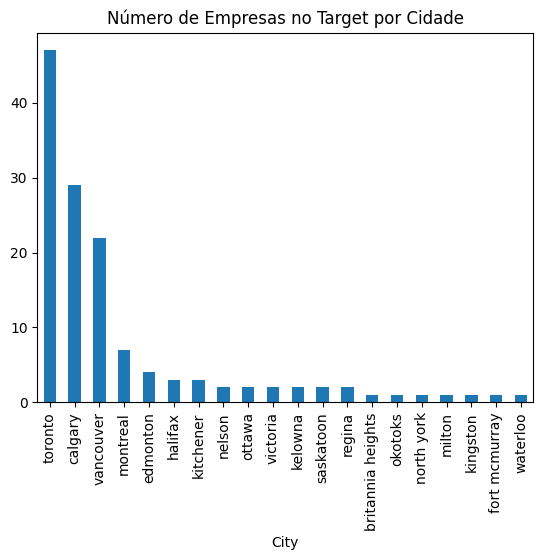

In [4]:
(data
    .groupby(by='City')
    .count()
    .sort_values(by='Name', ascending=False)
    ['Name']
    .plot.bar()
)

plt.title('Número de Empresas no Target por Cidade')

Text(0.5, 1.0, 'Número de Empresas no Target por Província')

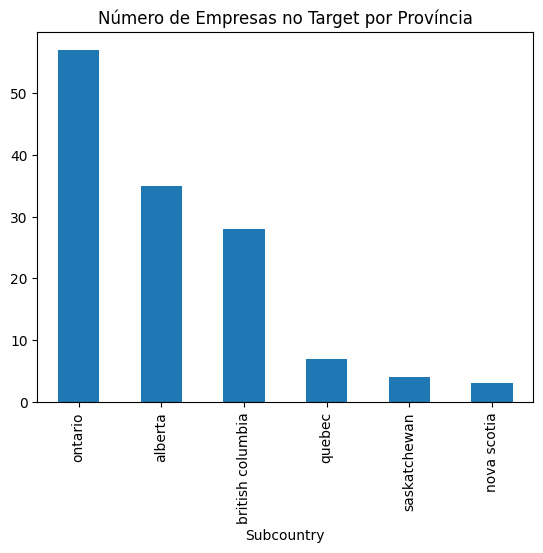

In [5]:
(data
    .groupby(by='Subcountry')
    .count()
    .sort_values(by='Name', ascending=False)
    ['Name']
    .plot.bar()
)

plt.title('Número de Empresas no Target por Província')

Na distribuição de empresas do target por cidade, três delas se distanciam sutilmente das demais, mesmo considerando a distibuição em formato exponencial: Toronto, Calgary e Vancouver (quase na ordem das maiores cidades... Montreal é maior que Vancouver, no caso).

Seguindo a mesma lógica, a distribuição das empresas do target entre as maiores províncias segue a das cidades, com ontario (na qual se localiza Tortonto), Alberta (onde se encontra Calgary) e British Columbia (onde se localiza Vancouver) apresentando uma separação em relação às demais.

Sob o ponto-de-vista de clusters de negócios, os melhores locais para empresas do target no Canadá são Toronto, Alberta e Vancouver, que são polos de atração suficientemente fortes para levar suas províncias ao topo.

### 3.2. Número de Colaboradores

Text(0.5, 1.0, 'Histograma do número de colaboradores por empresa do target')

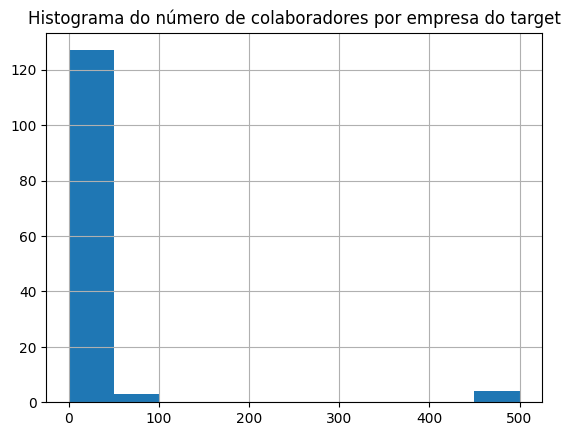

In [6]:
(data
    ['Employees']
    .hist()
)

plt.title('Histograma do número de colaboradores por empresa do target')

In [7]:
for _, row in data[data['Employees'] > 400].iterrows():
    print(row['Name'])
    print(row['Description'] + '\n\n')

jurota company 
the group currently operates mainly in the five business areas of aircraft, special purpose trucks, fluid  water treatment equipment , industrial machinery systems, and parking systems, with the entire group working in concert to cover everything from production through after sales services. 


echologics 
echologics is a leader in the development of acoustic technologies that can non invasively detect underground leaks and assess the conditions of water mains comprised of a variety of materials including ductile ironasbestos cement  ac cast ironplasticpre stressed cylinder concrete  pccp polyvinyl chloride  pvc our core technology, which uses a proprietary acoustic based leak detection system and a comprehensive proprietary database, has enabled municipalities across north america, and in europe, south africa, singapore and australia, to better understand their water infrastructure to reduce costs and prioritize capital spending   without breaking ground or disrupting 

Existe uma forte concentração em pequenas empresas, com 50 colaboradores ou menos e, por isso, foi realizada uma inspeção nos casos extremos, com número de colaboradores entre 450 e 500.

A inspeção resultou na identificaçao de empresas de grande porte que realmente trabalham nas áreas do target, como visto acima, em suas descrições.

Text(0.5, 1.0, 'Número de Empresas no Target por Cidade')

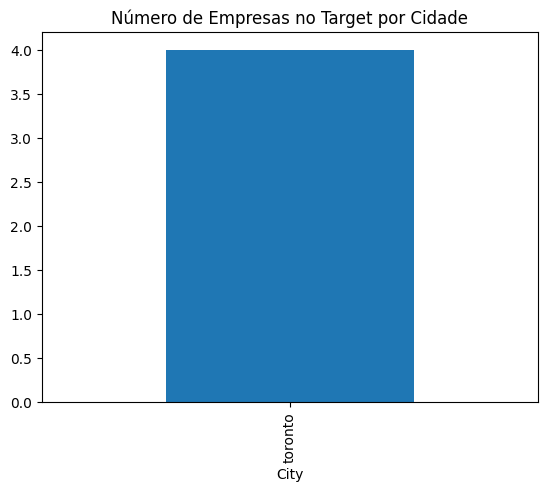

In [8]:
(data
    [(data['City'].isin(['toronto', 'vancouver', 'calgary'])) & (data['Employees'] > 200)]
    .groupby(by='City')
    .count()
    .sort_values(by='Name', ascending=False)
    ['Name']
    .plot.bar()
)

plt.title('Número de Empresas no Target por Cidade')

Interessante notar que a maior cidade do Canadá é também a única que possui empresas do target com mais de 200 colaboradores e isso pode indicar que a cidade apresenta uma atratividade especial para essas empresas. De fato, sob um ponto-de-vista de cadeia produtiva, Toronto tem muitos atrativos para grandes empresas.